# Concrete Compressive Strength Prediction using K-Nearest Neighbors

- Download the dataset about concrete from the UCI machine learning repository. Concrete is the most important material in civil engineering. Its compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. Use it to predict Concretes compressive strength in megapascals.
- Here is the [link](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength) to the dataset

## Step 1: Import necessary Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Step 2: Load the Dataset

- Read the `Concrete_Data.xls` file into pandas and assign it to the variable name `concreteData`
- Use the `DataFrame.info()` and `DataFrame.head()` methods to print information about the `concreteData` dataframe as well as the first few rows

In [2]:
concreteData = pd.read_excel("Concrete_Data.xls")
concreteData.info()
concreteData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Step 3: Split the Dataset

- The `input features` (independent variables) are the `first 7 columns`, and the `target variable` (dependent variable) is `the last column, "Concrete compressive strength (MPa, megapascals)`."

In [3]:
X = concreteData.iloc[:, :-1]  # Input features
y = concreteData.iloc[:, -1]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 4: Train the KNN model

In [4]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## Step 5: Evaluate the Model

To assess if the KNN model is a good fit for your concrete compressive strength prediction task, you can consider several evaluation metrics and techniques. Here are a few commonly used approaches:

1. `Mean Squared Error (MSE)`: In the provided code, the MSE is calculated and printed as the evaluation metric. The lower the MSE, the better the model fits the data. However, the absolute value of the MSE might not provide an intuitive understanding of the model's performance.

2. `R-squared (R²) or Coefficient of Determination`: R² represents the proportion of the variance in the target variable that can be explained by the model. It ranges between 0 and 1, where 1 indicates a perfect fit. You can calculate R² using the `score()` method of the trained model

In [5]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE):", mse)

r2 = knn.score(X_test, y_test)
print(f"R-squared (R²):", r2)

Mean Squared Error (MSE): 76.0192996785488
R-squared (R²): 0.7113749702054717


## Step 6: Visual Inspection

If the predicted values closely follow the diagonal line (the ideal scenario), it suggests a good fit.

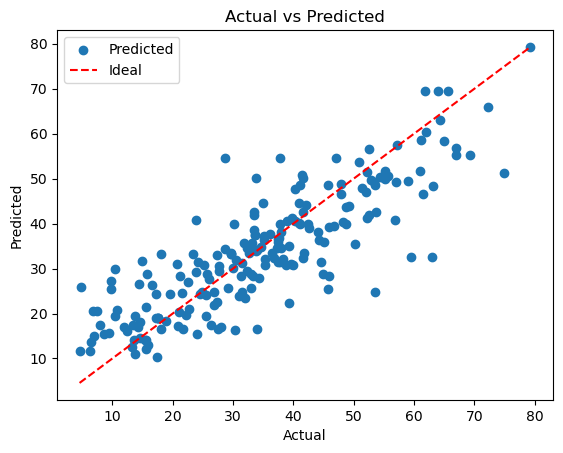

In [6]:
plt.scatter(y_test, y_pred, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()